In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import statsmodels.api as sm


In [98]:
data_house = pd.read_csv("house.csv")
data_house.head()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176


### Multiple linear regression model

Build a predictive model for Price using multiple features (net_sqm, center_distance, metro_distance, bedroom_count, age, floor). Tasks include:
1. Feature selection and multicollineaity assessment using Variance Inflation Factor (VIF)
2. Model training with train-test split
3. Residual analysis and assumption checking
4. Model Evaluation (using R^2, RMSE)
5. Interpretation of coefficients
6. Performs residual analysis with plots (QQ plot, residual distribution, scatter)

In [101]:
X = df[["net_sqm", "center_distance", "metro_distance", "bedroom_count", "age", "floor"]]
y = df[["price"]]

In [103]:
# VIF
X_with_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns

In [105]:
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [107]:
vif_data

,Feature,VIF
0,net_sqm,5.896119
1,center_distance,6.724060
2,metro_distance,5.946622
3,bedroom_count,7.175353
4,age,3.276097
5,floor,2.349896


In [109]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
X_train

,net_sqm,center_distance,metro_distance,bedroom_count,age,floor
3286,238.640159,1029.44,111.374614,8,54,1
4280,473.708857,123.42,167.717534,6,9,1
2377,203.717225,1112.67,50.735466,4,23,2
4244,220.029788,454.25,77.710586,2,13,6
1104,100.780953,1869.89,100.868884,2,25,13
...,...,...,...,...,...,...
3444,354.992248,855.36,41.806634,10,14,1
466,34.383805,920.72,83.296195,1,45,19
3092,138.462796,1180.77,75.172892,7,33,1
3772,463.795502,1462.64,152.929621,8,65,3


In [113]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [115]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [117]:
print(f"Training R^2: {r2_score(y_train, y_pred_train)}")
print(f"Testing R^2: {r2_score(y_test, y_pred_test)}")

Training R^2: 0.7163956999541068
Testing R^2: 0.7292844173359685


In [119]:
print(f"Training RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")

Training RMSE: 2094.856849526217


In [121]:
print(f"Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")

Testing RMSE: 2007.181602462175


In [139]:
residuals = y_test - y_pred_test

In [155]:
# If residuals is a column vector (862,1), flatten it
# residuals = np.ravel(residuals)
# or equivalently
residuals = residuals.flatten()

Text(0.5, 1.0, 'Residual Distribution')

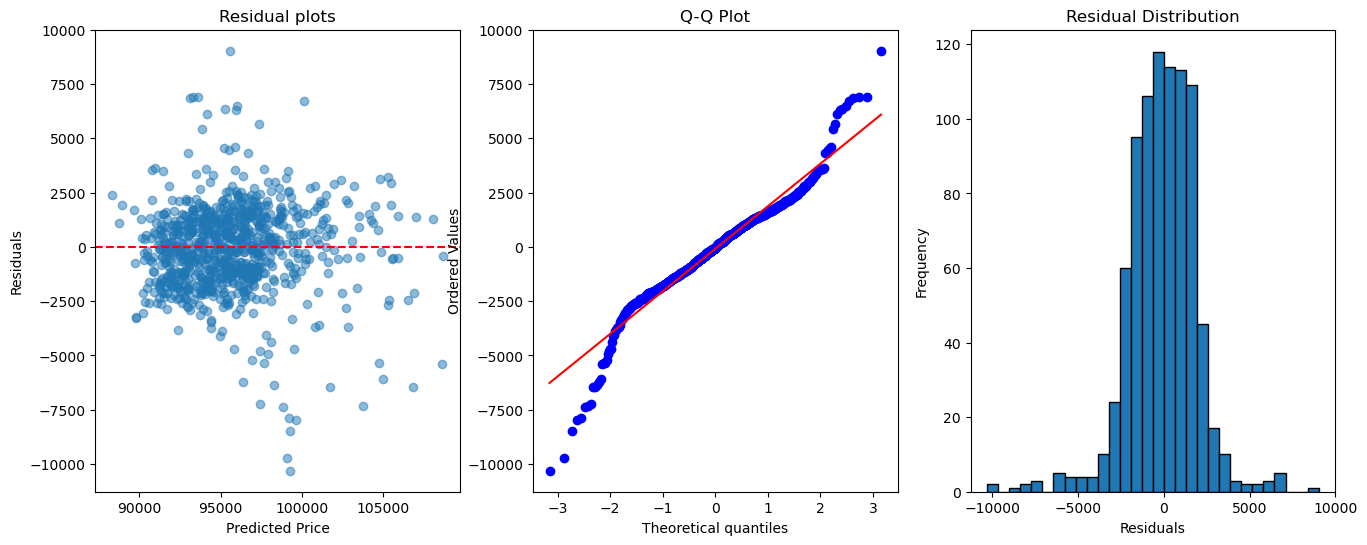

In [153]:
plt.figure(figsize = (16, 6))
plt.subplot(1, 3, 1)
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual plots")

plt.subplot(1, 3, 2)
stats.probplot(residuals, dist='norm', plot=plt)
plt.title("Q-Q Plot")

plt.subplot(1, 3, 3)
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")

In [165]:
# interaction effect analysis

# determins if feature effects vary based on other features

# creating interaction terms (net_sqm, x bedroom_count, age x centre_distance)

df['Sqm_Bedroom_Interaction'] = df['net_sqm'] * df['bedroom_count']
df['Age_Center_Interaction'] = df['age'] * df['center_distance']
df.head()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price,Sqm_Bedroom_Interaction,Age_Center_Interaction
0,1,26.184098,1286.68,204.003817,22,67,96004.804557,26.184098,86207.56
1,1,34.866901,1855.25,186.980360,8,30,92473.722568,34.866901,55657.50
2,1,36.980709,692.09,111.224999,24,24,98112.519942,36.980709,16610.16
3,1,17.445723,1399.49,237.998760,1,66,92118.326874,17.445723,92366.34
4,1,52.587646,84.65,100.996400,20,3,98976.653176,52.587646,253.95


In [191]:
# model without interaction
X_base = df[['net_sqm', 'bedroom_count', 'Sqm_Bedroom_Interaction', 'center_distance', 'metro_distance', 'age', 'floor']]
X_base_const = sm.add_constant(X_base)
model_base = sm.OLS(df['price'], X_base_const).fit()

X_interact = df[['net_sqm', 'bedroom_count', 'Sqm_Bedroom_Interaction', 'center_distance', 'metro_distance', 'age', 'floor']]
X_interact_cost = sm.add_constant(X_interact)

In [193]:
# X_interact_cost

In [195]:
model_interact = sm.OLS(df['price'], X_interact_cost).fit()

In [201]:
print(f'Base Model R^2: {model_base.rsquared:.4f}')
print(f'Base Model R^2: {model_interact.rsquared:.4f}')

Base Model R^2: 0.7191
Base Model R^2: 0.7191


In [224]:
pearson_corr, pearson_p = stats.pearsonr(df['net_sqm'], df['price'])
print(f"Pearson correlation (Net Sqm vs Price): {pearson_corr:.3f}, p-value: {pearson_p:.4f}")

# --- 2. Spearman correlation (Center Distance vs Price) ---
spearman_corr, spearman_p = stats.spearmanr(df['center_distance'], df['price'])
print(f"Spearman correlation (Center Distance vs Price): {spearman_corr:.3f}, p-value: {spearman_p:.4f}")

# --- 3. Pearson correlation (Metro Distance vs Price) ---
metro_corr, metro_p = stats.pearsonr(df['metro_distance'], df['price'])
print(f"Pearson correlation (Metro Distance vs Price): {metro_corr:.3f}, p-value: {metro_p:.4f}")


Pearson correlation (Net Sqm vs Price): 0.682, p-value: 0.0000
Spearman correlation (Center Distance vs Price): -0.445, p-value: 0.0000
Pearson correlation (Metro Distance vs Price): -0.146, p-value: 0.0000
